## FACE RECOGNITION WITH CNN

### Step1 : You should need to import libraries

In [1]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Step2 : After loading the data you have to normalize

In [2]:
# load dataset
data = np.load("ORL_faces.npz")
# load Train and Test images 
x_train = data['trainX']
x_test = data['testX']

# Normalize every image 
x_train = np.array(x_train,dtype='float32')/255
x_test = np.array(x_test,dtype='float32')/255

# Load the label images 
y_train = data['trainY']
y_test = data['testY']

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 10304)
(160, 10304)
(240,)
(160,)


### Step3 : Split the dataset

##### Validation Dataset : this data set is used to minimize overfitting.

In [3]:
# We usually use 30% of every dataset as validation dataset but here we only use 5% becauce the number of images is very low.
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=.05,random_state=1024)
print(x_train.shape)
print(y_train.shape)

(228, 10304)
(228,)


### Step4 : Transform the images to equal sizes to feed in CNN

In [4]:
imp_rows = 112
imp_cols = 92
batch_size = 512
im_shape = (imp_rows,imp_cols,1)
# Change the size of image
x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0],*im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)
print('x_train shape : {}'.format(x_train.shape))
print('x_test shape : {}'.format(x_test.shape))

x_train shape : (228, 112, 92, 1)
x_test shape : (160, 112, 92, 1)


### Step5
Build a CNN model that has 3 main layers:

- Convolutional Layer
- Pooling Layer
- Fully Connected Layer

In [5]:
CNN_model = Sequential()
CNN_model.add(Conv2D(filters=36,kernel_size=7,activation='relu',input_shape=im_shape))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Conv2D(filters=54,kernel_size=(5,5),activation='relu',input_shape=im_shape))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(2024,activation='relu'))
CNN_model.add(Dropout(0.5))    
CNN_model.add(Dense(1024,activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(512,activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(20,activation='Softmax'))#20 is the number of outputs

In [6]:
CNN_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

### Step6 : Train the model

In [8]:
history = CNN_model.fit(x_train,y_train,
                        epochs=250,
                        batch_size=512,
                        verbose=1,
                        validation_data=(x_valid,y_valid)
                       )

Epoch 1/250
1/1 [==============================] - 13s 13s/step - loss: 3.0044 - accuracy: 0.0351 - val_loss: 3.0124 - val_accuracy: 0.0000e+00
Epoch 2/250
1/1 [==============================] - 6s 6s/step - loss: 2.9922 - accuracy: 0.0482 - val_loss: 3.0184 - val_accuracy: 0.0000e+00
Epoch 3/250
1/1 [==============================] - 6s 6s/step - loss: 2.9845 - accuracy: 0.0526 - val_loss: 3.0162 - val_accuracy: 0.0000e+00
Epoch 4/250
1/1 [==============================] - 6s 6s/step - loss: 2.9871 - accuracy: 0.0789 - val_loss: 3.0198 - val_accuracy: 0.0000e+00
Epoch 5/250
1/1 [==============================] - 6s 6s/step - loss: 2.9678 - accuracy: 0.0482 - val_loss: 3.0251 - val_accuracy: 0.0000e+00
Epoch 6/250
1/1 [==============================] - 6s 6s/step - loss: 3.0016 - accuracy: 0.0263 - val_loss: 3.0219 - val_accuracy: 0.0000e+00
Epoch 7/250
1/1 [==============================] - 6s 6s/step - loss: 2.9850 - accuracy: 0.0833 - val_loss: 3.0147 - val_accuracy: 0.0000e+00
Epoc

In [9]:
score = CNN_model.evaluate(x_test,y_test)

5/5 [==============================] - 1s 209ms/step - loss: 0.2846 - accuracy: 0.9312


In [10]:
print('Test loss:',score[0])
print('Test Accuracy:',score[1])

Test loss: 0.2846294939517975
Test Accuracy: 0.9312499761581421


### Step7 : Plot the results

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


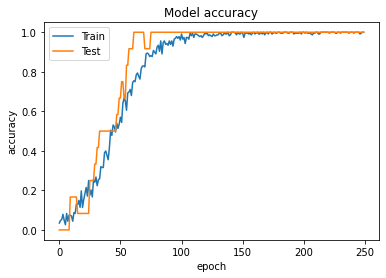

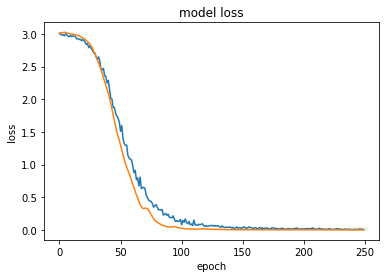

In [11]:
# list all the data in history
print(history.history.keys())
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()
# Smmarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Step8 : Iterate the model until the accuracy is above 90%

In [12]:
import tensorflow
y_test1 = tensorflow.keras.utils.to_categorical(y_test, 20)

In [13]:
predicted = CNN_model.predict(x_test)
print(y_test)
print(predicted)

[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]
[[9.99518156e-01 1.28600281e-04 1.86170510e-08 ... 4.42749865e-07
  8.10826605e-05 3.70250604e-08]
 [9.89057600e-01 4.66312340e-05 2.65192810e-08 ... 1.63644108e-06
  2.64760110e-05 4.26009628e-08]
 [9.93820608e-01 2.60221350e-05 6.31762802e-08 ... 1.71903812e-05
  3.68201363e-05 1.10531744e-07]
 ...
 [1.66919577e-07 6.80659468e-07 1.80071779e-02 ... 1.74451343e-04
  1.45277426e-08 9.73228216e-01]
 [2.03987565e-08 3.52956064e-08 4.12072707e-03 ... 4.23528672e-06
  2.71675682e-09 9.94928241e-01]
 [2.63075228

In [19]:
Y_pred = CNN_model.predict(x_valid)
#print('Accuracy is :',accuracy_score(y_valid,y_pred)

In [23]:
y_pred = (Y_pred > 0.5) * 1.0
#y_pred = y_pred.reshape(y_valid.shape)
#y_pred.sum()

In [28]:
predicted =np.array( CNN_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = np.argmax(CNN_model.predict(x_test), axis=-1)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

accuracy : 
0.93125
